In [3]:
#Project for Quantitative Criticism Lab (UT Austin)
#Elias Sanchez
#DATASET USED : WORLD ATLAS OF LANGUAGE STRUCTURE (WALS) (WEBSITE: http://wals.info/)

import pandas as pd
import numpy as np
import csv
import math as m
import matplotlib.pyplot as plt

In [4]:
# Converts WALS coordinate data n to nearest n.25 or n.75 in order to search for classification
def rco(num):
    n = num-int(num)
    if n<=0.5:
        return (int(num)+ 0.25)
    else:
        return(int(num)+0.75)

In [5]:
#Auxilary binary search function
def binary(alist, item):
    if len(alist) == 0:
        return (-1)
    else:
        midpoint = len(alist)//2
        if alist[midpoint]==item:
          return (midpoint)
        else:
          if item<alist[midpoint]:
            return binary(alist[:midpoint],item)
          else:
            return binary(alist[midpoint+1:],item)

In [6]:
lang_df = pd.read_csv('language.csv', encoding = 'ISO-8859-1')

In [7]:
#koppen_1901-2010.tsv contains a file with latitude and longitudes that are close to .25 and .75 that gives the climate
koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)

In [8]:
#Translate longitude and latitude to Climate use binary search to look for num. coordinates
Clim = []
for i in range(0, len(lang_df)):
    s = 0
    if rco(lang_df['longitude'][i]) == -179.75:
        s = 0
    else:
        #binary search in first columns
        long = rco(lang_df['longitude'][i]) - 0.5
        s = binary(koppen['longitude'],long)
    
    if s==-1:
            Clim.append(str("NaN"))
            print(i)
    else:
        j=s
        lat = rco(lang_df['latitude'][i])
        lon = rco(lang_df['longitude'][i])
        
        while bool(lat == koppen['latitude'][j] and lon== koppen['longitude'][j])==False and bool(koppen['longitude'][j]< lon+1)==True:
            j=j+1
            if j== len(koppen['latitude'])-1:
                break
        
        if rco(lang_df['latitude'][i])== koppen['latitude'][j] and rco(lang_df['longitude'][i])==koppen['longitude'][j]:
            Clim.append(str(koppen['p1901_2010'][j]))
        else:
            Clim.append("NaN")
                                                                       
        

In [481]:
k = np.asarray(Clim)
k = k.tolist()

#get first letter of Koppen classification
for i in range(0, len(k)):
    if k[i]!='NaN':
        k[i] = k[i][2]

lang_df["Climate"] = k
# drop languages that where unale to be classified with Koppen
lang_df = lang_df[lang_df.Climate != 'NaN']

In [489]:
#Testing features on Phonology Area - Drop rows with null values
df1 = lang_df[lang_df['1A Consonant Inventories'].notnull() & lang_df['2A Vowel Quality Inventories'].notnull() & lang_df['3A Consonant-Vowel Ratio'].notnull() & lang_df['4A Voicing in Plosives and Fricatives'].notnull()& lang_df['13A Tone'].notnull() 
& lang_df['18A Absence of Common Consonants'].notnull() & lang_df['7A Glottalized Consonants'].notnull() & lang_df['8A Lateral Consonants'].notnull() & lang_df['9A The Velar Nasal'].notnull()& lang_df['10A Vowel Nasalization'].notnull()]
features = ['1A Consonant Inventories', '2A Vowel Quality Inventories', '3A Consonant-Vowel Ratio', '4A Voicing in Plosives and Fricatives', '13A Tone', '18A Absence of Common Consonants', '7A Glottalized Consonants', '8A Lateral Consonants', '9A The Velar Nasal', '10A Vowel Nasalization']
col = ['Name', '1A Consonant Inventories', '2A Vowel Quality Inventories', '3A Consonant-Vowel Ratio', '4A Voicing in Plosives and Fricatives', '13A Tone', '18A Absence of Common Consonants', '7A Glottalized Consonants', '8A Lateral_Consonants', '9A The Velar Nasal', '10A Vowel Nasalization', 'Climate']

#Target Vector
trg = df1['Climate']
trg = trg.tolist()

In [610]:
phon_df = lang_df[lang_df['4A Voicing in Plosives and Fricatives'].notnull() & lang_df['5A Voicing and Gaps in Plosive Systems'].notnull() & 
                  lang_df['6A Uvular Consonants'].notnull() & lang_df['7A Glottalized Consonants'].notnull() & 
                  lang_df['8A Lateral Consonants'].notnull() & lang_df['11A Front Rounded Vowels'].notnull() & 
                  lang_df['13A Tone'].notnull() & lang_df['18A Absence of Common Consonants'].notnull() & 
                  lang_df['19A Presence of Uncommon Consonants'].notnull() & lang_df['12A Syllable Structure'].notnull()]

phon_feat = ['4A Voicing in Plosives and Fricatives', '5A Voicing and Gaps in Plosive Systems', '6A Uvular Consonants', '7A Glottalized Consonants',
                '8A Lateral Consonants', '11A Front Rounded Vowels', '13A Tone', '18A Absence of Common Consonants', '19A Presence of Uncommon Consonants', '12A Syllable Structure']

#clphon = pd.Series.tolist(phon_df['Climate'])
#stats_out(clphon)

In [613]:
#Pre-proccessing - OHE for both y input and output vectors
from sklearn.preprocessing import OneHotEncoder
x_phon, y_phon = df_list(phon_feat, phon_df)
enc = OneHotEncoder()
x_phon = enc.fit_transform(x_phon).toarray()
x_phon
lb.fit(y_phon)
y_phon = lb.transform(y_phon)
y_phon
#run SVC - One-vs.-rest
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import LinearSVC

#Method 1
sv_ovr = OneVsRestClassifier(LinearSVC(random_state=0, class_weight='balanced'))

#Method 2

svmm = OneVsRestClassifier(svm.SVC(kernel= "linear", class_weight='balanced'))

#reduced cv to 4 because in this subdataset there were only 4 samples for polar
scores_1 = cross_val_score(sv_ovr, x_phon, y_phon, cv=5)
scores_2 = cross_val_score(svmm, x_phon, y_phon, cv=5)
#I don't think svm.SVC allows for OHE, and only does label encoding
#scores_3 = cross_val_score(svmm, X, Y, cv=4)

print("C-V scores, Method 1  - OHE : ")
print(scores_1)
print("C-V scores, Method 1  - non-OHE : ")
print(scores_2)
#print("C-V scores, Method 2  - OHE :")
#print(scores_3)

#95 percent Confidence Interval
print("Accuracy for C-V (95 CI) , Method 1  - OHE : %0.2f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
print("Accuracy for C-V (95 CI), Method 2  - OHE : %0.2f (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2))
#print("Accuracy for C-V (95 CI), Method 2  - Label Encoding : %0.2f (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2))


C-V scores, Method 1  - OHE : 
[ 0.24390244  0.35365854  0.2345679   0.25925926  0.24691358]
C-V scores, Method 1  - non-OHE : 
[ 0.23170732  0.34146341  0.27160494  0.20987654  0.2345679 ]
Accuracy for C-V (95 CI) , Method 1  - OHE : 0.27 (+/- 0.09)
Accuracy for C-V (95 CI), Method 2  - OHE : 0.26 (+/- 0.09)


In [572]:
#Basic Ststistic for Output vector function Distribution of Climate languages for WALS data set (General)
def stats_out(Y):
    A=0
    B=0
    C=0
    D=0
    E=0
    for i in range(0,len(Y)):
        if Y[i] == 'A':
            A+=1
        elif Y[i] == 'B':
            B+=1
        elif Y[i] == 'C':
            C+=1
        elif Y[i] == 'D':
            D+=1
        elif Y[i] == 'E':
            E+=1
    print("A - Tropical: " + str(A) )
    print("B - Arid: " + str(B) )
    print("C - Temperate: " + str(C) )
    print("D - Cold: " + str(D) )
    print("E - Polar: " + str(E) )

#Distribution of Climate languages for WALS data set (General)

Cl= pd.Series.tolist(lang_df['Climate'])
stats_out(Cl)
print(len(Cl))


    

A - Tropical: 1036
B - Arid: 344
C - Temperate: 553
D - Cold: 234
E - Polar: 68
2235


In [573]:
climor = pd.Series.tolist(morph_df['Climate'])
stats_out(climor)

A - Tropical: 110
B - Arid: 60
C - Temperate: 78
D - Cold: 38
E - Polar: 10


In [14]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


In [1]:
#Pandas DF and Features to X-feature list and Y-vector (Climate)

def df_list(features, df):
    l = []
    for i in range(0, len(features)):
        l.append(pd.Series.tolist(pd.to_numeric(df[features[i]].str[0])))
    
    x = []
    
    for i in range(0,len(l[0])):
        x.append([])
        
    for i in range(0,len(l[0])):
        for k in range(0,len(features)):
            x[i].append(l[k][i])
    Y = pd.Series.tolist(df['Climate'])
    
    return (x,Y)
    

In [574]:
#confusion matrix for SVC for One vs Rest Classifier
sv_ovr = OneVsRestClassifier(LinearSVC(random_state=0, class_weight='balanced'))
sv_ovr.fit(x_phon, y_phon)
pred = sv_ovr.predict(x_phon)
yn_phon = lb.inverse_transform(y_phon)
pred = lb.inverse_transform(pred)
y_actu = pd.Series(yn_phon, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,A,B,C,D,E
Actual,,,,,
A,143,19,13,1,0
B,22,41,7,4,0
C,30,25,42,3,0
D,5,10,17,13,0
E,0,4,4,3,1


In [575]:
#Normalized confusion matrix
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,A,B,C,D,E
Actual,,,,,
A,0.812500,0.256757,0.13,0.022222,0.000000
B,0.125000,0.554054,0.07,0.088889,0.000000
C,0.170455,0.337838,0.42,0.066667,0.000000
D,0.028409,0.135135,0.17,0.288889,0.000000
E,0.000000,0.054054,0.04,0.066667,0.083333


In [576]:
#Simple accuracy measurement
c=0
for i in range(0, len(pred)):
    if pred[i]== yn_phon[i]:
        c=c+1
c/len(pred)


0.5896805896805897

In [577]:
#Feature Importance - for each list j, represents the jth feature vs Rest linear SVM's coefficient

sv_ovr.fit(x_phon, y_phon)
coef = sv_ovr.coef_


print("Coefficients for One vs Rest SVM:")
print(coef)
a = np.absolute(coef)
b = np.sum(a, axis=0)
b = np.square(b)
s = sum(b)
feat = np.true_divide(b,s)
feat = np.asarray(feat)

ind = np.argsort(feat)[::-1]

print("\n Feature ranking:")

X = np.asarray(x_phon)

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, ind[f] + 1, phon_feat[ind[f]], feat[ind[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feat[ind],
       color="r", align="center")
plt.xticks(range(X.shape[1]), ind+1)
plt.xlim([-1, X.shape[1]])
plt.show()







Coefficients for One vs Rest SVM:
[[ -1.27051691e-01   3.53472273e-02  -1.62104928e-01  -7.43161361e-02
   -2.59453761e-01  -2.15894227e-01  -3.40412830e-01   3.36002123e-01
    1.51633167e-01   6.08738136e-01  -2.16879840e-01  -6.24016636e-01
   -9.59671890e-02  -2.48821424e-01  -1.04082332e-01   1.23293606e-01
    4.08156978e-01   1.79650097e-02  -2.15882517e-01  -7.46266322e-01
    4.37511473e-01   4.67876354e-01   2.56162903e-02   4.04299748e-01
   -5.07704674e-01  -7.18213246e-01   3.16067913e-01  -2.68939204e-01
   -3.19453906e-01  -5.58003313e-02  -5.44496034e-02  -1.55970772e-01
   -1.17705153e-01  -2.16621271e-01  -4.61733583e-01   2.74288360e-01
   -2.30418456e-01   3.06359422e-01   3.18267711e-01  -1.01543652e+00
    1.29135366e+00  -6.52311225e-01   1.88745365e-02  -2.88873690e-01
    2.29233678e-01  -1.31885787e-01  -4.25473419e-01]
 [ -4.63340572e-04  -1.39514224e-01  -2.25045101e-01  -5.13942305e-02
    1.34792327e-03   1.07670747e-01   9.45953999e-01  -9.66280392e-01
  

IndexError: list index out of range

In [579]:
#Random Forest Multi-Classification with One Hot Encoding for Climate Vector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split


In [578]:
train_x, test_x, train_y, test_y = train_test_split(x_phon, y_phon)

In [580]:
rfc = RandomForestClassifier()
rfc.fit(x_phon, y_phon)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [581]:
trained_model = rfc.fit(train_x, train_y)
trained_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [582]:
predictions = trained_model.predict(test_x)
test_y = lb.inverse_transform(test_y)
predictions = lb.inverse_transform(predictions)
print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))

Train Accuracy ::  0.790163934426
Test Accuracy  ::  0.56862745098


In [583]:
#Cross validation for RF 95% Confidence Interval
scores = cross_val_score(rfc, x_phon, y_phon, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.40243902  0.47560976  0.32098765  0.43209877  0.41975309]
Accuracy: 0.41 (+/- 0.10)


In [584]:
#Confusion matrix for tested sample
#predictions = lb.inverse_transform(predictions)
y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,A,B,C,D
Actual,,,,
A,46,3,2,1
B,7,3,2,0
C,12,2,6,3
D,8,0,1,3
E,2,0,0,1


In [585]:
#Feature Importance
importances = trained_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

X = np.asarray(x_phon)
print(X.shape[1])

for f in range(0,X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f+1 , indices[f] + 1, phon_feat[indices[f]], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), (indices+1))
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
47
1. feature 10 - 12A Syllable Structure (0.049635)


IndexError: list index out of range

In [586]:
#Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(random_state=0)

forest.fit(x_phon, y_phon)

etcv = cross_val_score(forest, x_phon, y_phon, cv=5)
print("Extra Tree Classifier:")

print(etcv,"\n")

print("Accuracy: %0.2f (+/- %0.2f)\n" % (etcv.mean(), etcv.std() * 2))

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(importances)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f]+1, phon_feat[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Extra Tree Classifier:
[ 0.3902439   0.53658537  0.2962963   0.34567901  0.41975309] 

Accuracy: 0.40 (+/- 0.16)

[ 0.02572544  0.03704512  0.02368171  0.03069451  0.02994998  0.02869715
  0.02562418  0.01529028  0.00227215  0.04602641  0.01803989  0.00778922
  0.03923758  0.04713277  0.03198354  0.02242687  0.00510122  0.02233459
  0.01797931  0.00664019  0.00424649  0.02709146  0.03328461  0.01768033
  0.01961109  0.00646486  0.02426875  0.01100588  0.00387151  0.0037816
  0.02956107  0.03554607  0.02432232  0.0142861   0.00593969  0.01222264
  0.00515674  0.00028016  0.03862991  0.0191633   0.04642865  0.01375523
  0.02301109  0.0036275   0.021103    0.0375475   0.03444033]
Feature ranking:


IndexError: list index out of range

In [590]:
#Linear SVM Feature Importance for binary classification Function
def svm_feat_imp(clas, xi, yi, feat_names):
    clas.fit(xi,yi)
    coef = clas.coef_[0]

    c = np.absolute(coef)
    s = sum(c)
    
    feat_c = np.true_divide(c,s)
    feat_c = np.asarray(feat_c)
    
    ind = np.argsort(feat_c)[::-1]
        
    print("Feature ranking:")
    
    xi = np.asarray(xi)
    
    print(xi.shape)
    print(len(feat_names))
    print(len(feat_c))
    
    for f in range(xi.shape[1]):
        print("%d. feature %d - %s (%f)" % (f + 1, ind[f], feat_names[ind[f]], feat_c[ind[f]]))
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(xi.shape[1]), feat_c[ind], color="r", align="center")
    plt.xticks(range(xi.shape[1]), ind+1)
    plt.xlim([-1, xi.shape[1]])
    plt.show()
    
    
#RF Feature Importance for binary classification Function
def RFC_feat_imp(trained_model, feat, inp):
    importances = trained_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in trained_model.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    inp = np.asarray(inp)

    for f in range(inp.shape[1]):
        print("%d. feature %d - %s (%f)" % (f+1, indices[f], feat[indices[f]], importances[indices[f]]))
    
    print(indices)
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(inp.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(inp.shape[1]), indices)
    plt.xlim([-1, inp.shape[1]])
    plt.show()
    

    
    

In [372]:
subsets = [['A','B'],['A','C'],['A','D'],['A','E'],['B','C'],['B','D'],['B','E'],['C','D'],['C','E'],['D','E']]

In [640]:
#Phonological - Binary Classifications

def Clim_let(lst):
    
    dic ={'A':'TROPICAL','B':'ARID', 'C':'TEMPERATE', 'D': 'COLD', 'E':'POLAR'}
    print(dic.get(lst[0]) + " AND " + dic.get(lst[1]) + " - BINARY CLASSIFICATION")
    
    

#Function that makes binary classification between each individual class for RF and linear SVM with CV and Feature importance for each


#Get each individual sample from the data set and put it into lists
def binary_clas(df, ft, clim_subs):
    
    x_lst = []
    y_lst = []
    for i in range(0, len(subsets)):
        x = []
        y = []
        b_df =  df[(df['Climate'] == str(clim_subs[i][0])) | (df['Climate'] == str(clim_subs[i][1]))]
        x,y = df_list(ft, b_df)
        x_lst.append(x)
        y_lst.append(y)
    
    #Initialize classifiers
    rf = RandomForestClassifier(class_weight = 'balanced')
    sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
    et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')

    for j in range(0,len(y_lst)):
        
        Clim_let(clim_subs[j])
        trained_model = rf.fit(x_lst[j],y_lst[j])
        cvsv = cross_val_score(sv, x_lst[j], y_lst[j], cv=4)
        
        t_m = et.fit(x_lst[j],y_lst[j])
        
        x_lst[j] = enc.fit_transform(x_lst[j]).toarray()
        print("Linear SVM Classification C-V:")
        print(cvs)
        print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
        print("Linear SVM Feature Importance:")
        #svm_feat_imp(sv, x_lst[j], y_lst[j], ft)
        
        cvrf = cross_val_score(rf, x_lst[j], y_lst[j], cv=5)
        print()
        
        print("Random Forest Classification:")
        
        print(cvrf)
        print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
        #RFC_feat_imp(trained_model, ft, x_lst[j])
        print()
        
        print("Extra Trees Classification:")
        
        etcv = cross_val_score(et, x_lst[j], y_lst[j], cv=5)
        print(etcv)
        print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
        #RFC_feat_imp(t_m, ft, x_lst[j])
        
        print()
        
        
        
    
    

TROPICAL AND ARID - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.60 (+/- 0.07)
Linear SVM Feature Importance:
Feature ranking:
(250, 10)
10
10
1. feature 2 - 6A Uvular Consonants (0.307602)
2. feature 9 - 12A Syllable Structure (0.227107)
3. feature 4 - 8A Lateral Consonants (0.227107)
4. feature 8 - 19A Presence of Uncommon Consonants (0.086836)
5. feature 0 - 4A Voicing in Plosives and Fricatives (0.040201)
6. feature 5 - 11A Front Rounded Vowels (0.035391)
7. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.026749)
8. feature 6 - 13A Tone (0.026458)
9. feature 3 - 7A Glottalized Consonants (0.022510)
10. feature 7 - 18A Absence of Common Consonants (0.000040)


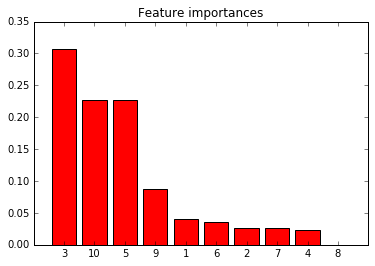


Random Forest Classification:
[ 0.84313725  0.7         0.68        0.72        0.73469388]
Accuracy: 0.74 (+/- 0.11)

Extra Trees Classification:
[ 0.78431373  0.66        0.7         0.74        0.65306122]
Accuracy: 0.71 (+/- 0.10)

TROPICAL AND TEMPERATE - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.68 (+/- 0.10)
Linear SVM Feature Importance:
Feature ranking:
(276, 10)
10
10
1. feature 2 - 6A Uvular Consonants (0.272310)
2. feature 7 - 18A Absence of Common Consonants (0.167122)
3. feature 5 - 11A Front Rounded Vowels (0.124399)
4. feature 9 - 12A Syllable Structure (0.124224)
5. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.118197)
6. feature 4 - 8A Lateral Consonants (0.094708)
7. feature 3 - 7A Glottalized Consonants (0.047392)
8. feature 6 - 13A Tone (0.023834)
9. feature 0 - 4A Voicing in Plosives and Fricatives (0.017873)
10. feature 8 - 19A Presence of Uncommon Consonants (0.009941)


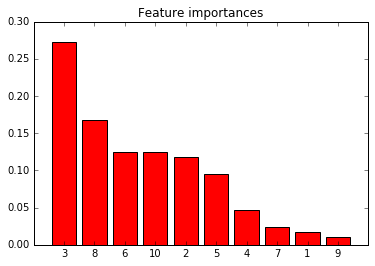


Random Forest Classification:
[ 0.69642857  0.83636364  0.65454545  0.6         0.69090909]
Accuracy: 0.70 (+/- 0.16)

Extra Trees Classification:
[ 0.66071429  0.81818182  0.58181818  0.63636364  0.65454545]
Accuracy: 0.67 (+/- 0.16)

TROPICAL AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.85 (+/- 0.04)
Linear SVM Feature Importance:
Feature ranking:
(221, 10)
10
10
1. feature 9 - 12A Syllable Structure (0.175659)
2. feature 2 - 6A Uvular Consonants (0.175649)
3. feature 5 - 11A Front Rounded Vowels (0.175577)
4. feature 4 - 8A Lateral Consonants (0.133029)
5. feature 6 - 13A Tone (0.097725)
6. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.082084)
7. feature 7 - 18A Absence of Common Consonants (0.066526)
8. feature 3 - 7A Glottalized Consonants (0.038974)
9. feature 0 - 4A Voicing in Plosives and Fricatives (0.031267)
10. feature 8 - 19A Presence of Uncommon Consonants (0.023510)


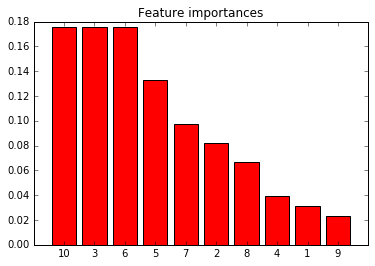


Random Forest Classification:
[ 0.91111111  0.88636364  0.90909091  0.93181818  0.81818182]
Accuracy: 0.89 (+/- 0.08)

Extra Trees Classification:
[ 0.93333333  0.84090909  0.86363636  0.93181818  0.86363636]
Accuracy: 0.89 (+/- 0.08)

TROPICAL AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.91 (+/- 0.04)
Linear SVM Feature Importance:
Feature ranking:
(188, 10)
10
10
1. feature 2 - 6A Uvular Consonants (0.292665)
2. feature 5 - 11A Front Rounded Vowels (0.188695)
3. feature 9 - 12A Syllable Structure (0.173042)
4. feature 6 - 13A Tone (0.087457)
5. feature 7 - 18A Absence of Common Consonants (0.084988)
6. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.073521)
7. feature 0 - 4A Voicing in Plosives and Fricatives (0.050611)
8. feature 3 - 7A Glottalized Consonants (0.041294)
9. feature 8 - 19A Presence of Uncommon Consonants (0.004625)
10. feature 4 - 8A Lateral Consonants (0.003101)


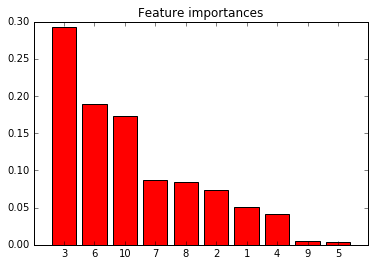


Random Forest Classification:
[ 0.97435897  0.92105263  0.91891892  0.94594595  1.        ]
Accuracy: 0.95 (+/- 0.06)

Extra Trees Classification:
[ 0.97435897  0.94736842  0.94594595  0.97297297  1.        ]
Accuracy: 0.97 (+/- 0.04)

ARID AND TEMPERATE - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.61 (+/- 0.04)
Linear SVM Feature Importance:
Feature ranking:
(174, 10)
10
10
1. feature 7 - 18A Absence of Common Consonants (0.315925)
2. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.292324)
3. feature 5 - 11A Front Rounded Vowels (0.130612)
4. feature 8 - 19A Presence of Uncommon Consonants (0.073051)
5. feature 6 - 13A Tone (0.062834)
6. feature 2 - 6A Uvular Consonants (0.041637)
7. feature 3 - 7A Glottalized Consonants (0.036538)
8. feature 4 - 8A Lateral Consonants (0.031413)
9. feature 0 - 4A Voicing in Plosives and Fricatives (0.015666)
10. feature 9 - 12A Syllable Structure (0.000000)


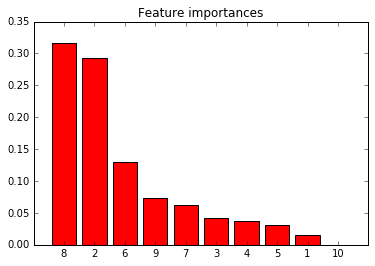


Random Forest Classification:
[ 0.57142857  0.71428571  0.62857143  0.65714286  0.70588235]
Accuracy: 0.66 (+/- 0.11)

Extra Trees Classification:
[ 0.62857143  0.68571429  0.6         0.62857143  0.61764706]
Accuracy: 0.63 (+/- 0.06)

ARID AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.62 (+/- 0.14)
Linear SVM Feature Importance:
Feature ranking:
(119, 10)
10
10
1. feature 5 - 11A Front Rounded Vowels (0.252507)
2. feature 6 - 13A Tone (0.181348)
3. feature 7 - 18A Absence of Common Consonants (0.129397)
4. feature 2 - 6A Uvular Consonants (0.116329)
5. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.093945)
6. feature 9 - 12A Syllable Structure (0.093918)
7. feature 4 - 8A Lateral Consonants (0.058811)
8. feature 8 - 19A Presence of Uncommon Consonants (0.031419)
9. feature 3 - 7A Glottalized Consonants (0.025863)
10. feature 0 - 4A Voicing in Plosives and Fricatives (0.016465)


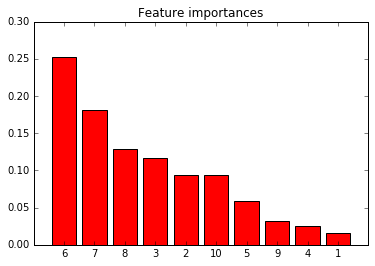


Random Forest Classification:
[ 0.625       0.625       0.79166667  0.66666667  0.7826087 ]
Accuracy: 0.70 (+/- 0.15)

Extra Trees Classification:
[ 0.66666667  0.66666667  0.70833333  0.75        0.73913043]
Accuracy: 0.71 (+/- 0.07)

ARID AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.72 (+/- 0.24)
Linear SVM Feature Importance:
Feature ranking:
(86, 10)
10
10
1. feature 5 - 11A Front Rounded Vowels (0.319235)
2. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.127669)
3. feature 6 - 13A Tone (0.127469)
4. feature 7 - 18A Absence of Common Consonants (0.123570)
5. feature 2 - 6A Uvular Consonants (0.103721)
6. feature 9 - 12A Syllable Structure (0.079782)
7. feature 0 - 4A Voicing in Plosives and Fricatives (0.039865)
8. feature 4 - 8A Lateral Consonants (0.034553)
9. feature 8 - 19A Presence of Uncommon Consonants (0.031902)
10. feature 3 - 7A Glottalized Consonants (0.012234)


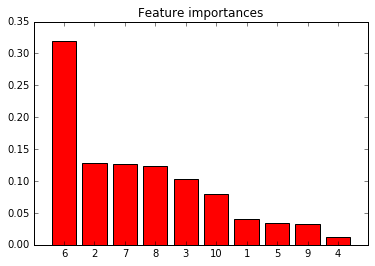


Random Forest Classification:
[ 0.83333333  0.77777778  0.88235294  0.94117647  0.9375    ]
Accuracy: 0.87 (+/- 0.12)

Extra Trees Classification:
[ 0.88888889  0.83333333  0.88235294  0.88235294  0.875     ]
Accuracy: 0.87 (+/- 0.04)

TEMPERATE AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.68 (+/- 0.26)
Linear SVM Feature Importance:
Feature ranking:
(145, 10)
10
10
1. feature 9 - 12A Syllable Structure (0.338557)
2. feature 5 - 11A Front Rounded Vowels (0.191598)
3. feature 6 - 13A Tone (0.140629)
4. feature 2 - 6A Uvular Consonants (0.095732)
5. feature 4 - 8A Lateral Consonants (0.089972)
6. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.079336)
7. feature 3 - 7A Glottalized Consonants (0.040961)
8. feature 8 - 19A Presence of Uncommon Consonants (0.011684)
9. feature 0 - 4A Voicing in Plosives and Fricatives (0.011520)
10. feature 7 - 18A Absence of Common Consonants (0.000010)


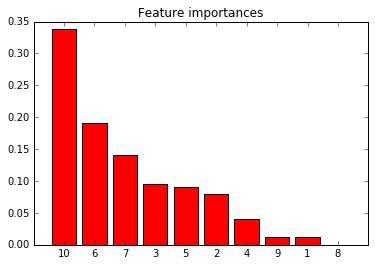


Random Forest Classification:
[ 0.55172414  0.4137931   0.68965517  0.75862069  0.72413793]
Accuracy: 0.63 (+/- 0.26)

Extra Trees Classification:
[ 0.51724138  0.34482759  0.72413793  0.62068966  0.65517241]
Accuracy: 0.57 (+/- 0.26)

TEMPERATE AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.76 (+/- 0.14)
Linear SVM Feature Importance:
Feature ranking:
(112, 10)
10
10
1. feature 5 - 11A Front Rounded Vowels (0.204976)
2. feature 9 - 12A Syllable Structure (0.180905)
3. feature 6 - 13A Tone (0.180053)
4. feature 2 - 6A Uvular Consonants (0.139757)
5. feature 0 - 4A Voicing in Plosives and Fricatives (0.102498)
6. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.069081)
7. feature 7 - 18A Absence of Common Consonants (0.057191)
8. feature 3 - 7A Glottalized Consonants (0.042870)
9. feature 8 - 19A Presence of Uncommon Consonants (0.022650)
10. feature 4 - 8A Lateral Consonants (0.000017)


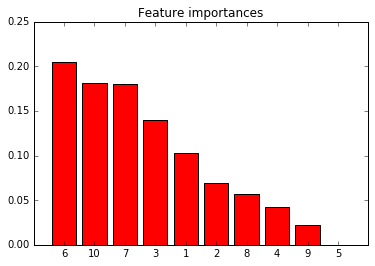


Random Forest Classification:
[ 0.91304348  0.86956522  0.86363636  0.86363636  0.90909091]
Accuracy: 0.88 (+/- 0.04)

Extra Trees Classification:
[ 0.86956522  0.86956522  0.86363636  0.90909091  0.95454545]
Accuracy: 0.89 (+/- 0.07)

COLD AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.56 (+/- 0.24)
Linear SVM Feature Importance:
Feature ranking:
(57, 10)
10
10
1. feature 0 - 4A Voicing in Plosives and Fricatives (0.240155)
2. feature 3 - 7A Glottalized Consonants (0.234034)
3. feature 1 - 5A Voicing and Gaps in Plosive Systems (0.189047)
4. feature 6 - 13A Tone (0.131292)
5. feature 2 - 6A Uvular Consonants (0.086946)
6. feature 7 - 18A Absence of Common Consonants (0.073411)
7. feature 9 - 12A Syllable Structure (0.031376)
8. feature 8 - 19A Presence of Uncommon Consonants (0.010335)
9. feature 5 - 11A Front Rounded Vowels (0.003314)
10. feature 4 - 8A Lateral Consonants (0.000090)


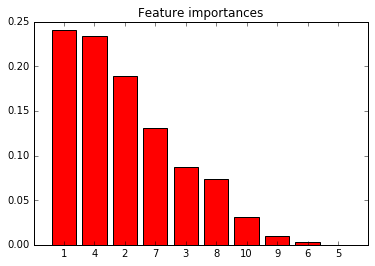


Random Forest Classification:
[ 0.91666667  0.75        0.63636364  0.72727273  0.81818182]
Accuracy: 0.77 (+/- 0.19)

Extra Trees Classification:
[ 0.83333333  0.75        0.63636364  0.72727273  0.72727273]
Accuracy: 0.73 (+/- 0.13)



In [639]:
#Phonological - Binary Classifications

#Binary classification for each climate
binary_clas(phon_df, phon_feat, subsets)


In [641]:
binary_clas(phon_df, phon_feat, subsets)


TROPICAL AND ARID - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.60 (+/- 0.07)
Linear SVM Feature Importance:

Random Forest Classification:
[ 0.8627451  0.64       0.74       0.76       0.7755102]
Accuracy: 0.76 (+/- 0.14)

Extra Trees Classification:
[ 0.82352941  0.72        0.7         0.76        0.7755102 ]
Accuracy: 0.76 (+/- 0.09)

TROPICAL AND TEMPERATE - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.68 (+/- 0.10)
Linear SVM Feature Importance:

Random Forest Classification:
[ 0.75        0.90909091  0.67272727  0.67272727  0.78181818]
Accuracy: 0.76 (+/- 0.17)

Extra Trees Classification:
[ 0.69642857  0.83636364  0.65454545  0.65454545  0.69090909]
Accuracy: 0.71 (+/- 0.13)

TROPICAL AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.85 (+/- 0.04)
Linear SVM Feature Importance:

Random Fo

In [646]:
#Binary GROUP Classification
#Tropical,Arid (F) vs Temperate, Cold, Polar (G)

y_ = lb.inverse_transform(y_phon)
for l in range(0,len(y_)):
    if y_[l]=='A' or y_[l]=='B':
        y_[l] = 'F'
    else:
        y_[l] = 'G'
#print(y_)
x_phon
rf = RandomForestClassifier(class_weight = 'balanced')
sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')
trained_model = rf.fit(x_phon,y_)
cvsv = cross_val_score(sv, x_phon, y_, cv=5)
t_m = et.fit(x_phon, y_)
print("Linear SVM Classification C-V:")
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
print("Linear SVM Feature Importance:")
#svm_feat_imp(sv, x_phon, trg, features)
cvrf = cross_val_score(rf, x_phon, y_, cv=5)
print()
print("Random Forest Classification:")
print(cvrf)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
#RFC_feat_imp(trained_model, features, X)
print()
print("Extra Trees Classification:")
etcv = cross_val_score(et, x_phon, y_, cv=5)
print(etcv)
print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
#RFC_feat_imp(t_m, features, x_phon)


Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.71 (+/- 0.10)
Linear SVM Feature Importance:

Random Forest Classification:
[ 0.70731707  0.82926829  0.64197531  0.66666667  0.72839506]
Accuracy: 0.71 (+/- 0.13)

Extra Trees Classification:
[ 0.69512195  0.84146341  0.60493827  0.69135802  0.72839506]
Accuracy: 0.71 (+/- 0.15)


In [647]:
#Binary Group Classification
#Arid,Cold,Polar(H) vs Tropical,Temperate(I)
y_ = lb.inverse_transform(y_phon)
for l in range(0,len(y_)):
    if y_[l]=='A' or y_[l]=='C':
        y_[l] = 'H'
    else:
        y_[l] = 'I'
#print(y_)
rf = RandomForestClassifier(class_weight = 'balanced')
sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')
trained_model = rf.fit(x_phon,y_)
cvsv = cross_val_score(sv, x_phon, y_, cv=5)
t_m = et.fit(x_phon, y_)
print("Linear SVM Classification C-V:")
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
print("Linear SVM Feature Importance:")
#svm_feat_imp(sv, x_phon, trg, features)
cvrf = cross_val_score(rf, x_phon, y_, cv=5)
print()
print("Random Forest Classification:")
print(cvrf)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
#RFC_feat_imp(trained_model, features, x_phon)
print()
print("Extra Trees Classification:")
etcv = cross_val_score(et, x_phon, y_, cv=5)
print(etcv)
print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
#RFC_feat_imp(t_m, features, x_phon)


Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.67 (+/- 0.06)
Linear SVM Feature Importance:

Random Forest Classification:
[ 0.74698795  0.66666667  0.7037037   0.75308642  0.65432099]
Accuracy: 0.70 (+/- 0.08)

Extra Trees Classification:
[ 0.72289157  0.69135802  0.71604938  0.72839506  0.75308642]
Accuracy: 0.72 (+/- 0.04)


In [649]:
#Binary Group Classification
#Arid,Temperate(J) vs Tropical,Cold,Polar(K)
y_ = lb.inverse_transform(y_phon)
for l in range(0,len(y_)):
    if y_[l]=='B' or y_[l]=='C':
        y_[l] = 'J'
    else:
        y_[l] = 'K'

rf = RandomForestClassifier(class_weight = 'balanced')
sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')
trained_model = rf.fit(x_phon, y_ )
cvsv = cross_val_score(sv, x_phon, y_ , cv=5)
t_m = et.fit(x_phon, y_ )
print("Linear SVM Classification C-V:")
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
print("Linear SVM Feature Importance:")
#svm_feat_imp(sv, X, trg, features)
cvrf = cross_val_score(rf, X, y_, cv=5)
print()
print("Random Forest Classification:")
print(cvrf)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
#RFC_feat_imp(trained_model, features, X)
print()
print("Extra Trees Classification:")
etcv = cross_val_score(et, X, y_, cv=5)
print(etcv)
print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
#RFC_feat_imp(t_m, features, X)

Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.57 (+/- 0.08)
Linear SVM Feature Importance:

Random Forest Classification:
[ 0.56097561  0.63414634  0.51219512  0.55555556  0.65      ]
Accuracy: 0.58 (+/- 0.10)

Extra Trees Classification:
[ 0.57317073  0.64634146  0.48780488  0.56790123  0.65      ]
Accuracy: 0.59 (+/- 0.12)


In [445]:
#PREPROCCESSING FOR MORPHOLOGY
#Same classification procedure for 8 Morphology Features - 23A, 24A, 25A, 25B, 26A, 27A, 28A, 29A

df2 = lang_df[lang_df['23A Locus of Marking in the Clause'].notnull() & lang_df['24A Locus of Marking in Possessive Noun Phrases'].notnull() & lang_df['25A Locus of Marking: Whole-language Typology'].notnull() & lang_df['25B Zero Marking of A and P Arguments'].notnull()& lang_df['26A Prefixing vs. Suffixing in Inflectional Morphology'].notnull() 
& lang_df['27A Reduplication'].notnull() & lang_df['28A Case Syncretism'].notnull() & lang_df['29A Syncretism in Verbal Person/Number Marking'].notnull()]

ft = ['23A Locus of Marking in the Clause','24A Locus of Marking in Possessive Noun Phrases','25A Locus of Marking: Whole-language Typology','25B Zero Marking of A and P Arguments','26A Prefixing vs. Suffixing in Inflectional Morphology', '27A Reduplication', '28A Case Syncretism', '29A Syncretism in Verbal Person/Number Marking']
#pre-proccesing
#F,P = df_list(df2,ft)
Cl= pd.Series.tolist(df2['Climate'])
stats_out(Cl)
print(len(Cl))




A - Tropical: 29
B - Arid: 18
C - Temperate: 29
D - Cold: 12
E - Polar: 3
91


In [227]:
#One v Rest SVM linear classifier and Cross-Validation with OHE for Climate 
classify = OneVsRestClassifier(estimator=SVC(random_state=0))

predic = classify.fit(F, P).predict(F)


In [228]:
y_actu = pd.Series(P, name='Actual')
y_pred = pd.Series(predic, name='Predicted')
confusion = pd.crosstab(y_actu, y_pred)
confusion

Predicted,1,2,3,4,5
Actual,,,,,
1,26,1,2,0,0
2,4,11,3,0,0
3,5,1,23,0,0
4,2,1,3,6,0
5,0,0,0,0,3


In [229]:
#Simple accuracy of SVM
c=0
for i in range(0, len(P)):
    if P[i]== predic[i]:
        c=c+1
c/len(P)


0.7582417582417582

In [496]:
#Random Forest for Morphology



In [ ]:
predictions = trained_mod.predict(test_f)
print("Train Accuracy :: ", accuracy_score(train_p, trained_mod.predict(train_f)))
print("Test Accuracy  :: ", accuracy_score(test_p, predictions))

In [ ]:
#Feature Importance
importances = trained_mod.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_mod.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

F = np.asarray(F)

for f in range(F.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f] , features[indices[f]], importances[indices[f]]))
    
print(indices)
plt.figure()
plt.title("Feature importances")
plt.bar(range(F.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(F.shape[1]), indices)
plt.xlim([-1, F.shape[1]])
plt.show()

In [491]:
binary_clas(df2, ft, subsets)